In [1]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

import warnings
warnings.filterwarnings("ignore")
# Используем красивый стиль для графиков
plt.style.use('seaborn-v0_8-whitegrid')
# Увеличим стандартный размер графиков
plt.rcParams['figure.figsize'] = (18, 8)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

print("Все библиотеки успешно импортированы!")

Все библиотеки успешно импортированы!


In [2]:
DB_PATH = "../data/weather.db"
TABLE_NAME = "weather_data"


conn = sqlite3.connect(DB_PATH)

df = pd.read_sql(f"SELECT * FROM {TABLE_NAME}", conn, parse_dates=['date'], index_col='date')
conn.close()


df.sort_index(inplace=True)

print(f"Загружено {len(df)} записей с {df.index.min().date()} по {df.index.max().date()}")
df.info()
df.head()

Загружено 5448 записей с 2010-11-01 по 2025-09-30
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5448 entries, 2010-11-01 to 2025-09-30
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cloud_cover_percent_day      5448 non-null   float64
 1   cloud_cover_percent_evening  5448 non-null   float64
 2   cloud_cover_percent_morning  5448 non-null   float64
 3   pressure_day                 5448 non-null   float64
 4   pressure_evening             5448 non-null   float64
 5   pressure_morning             5448 non-null   float64
 6   temperature_day              5448 non-null   float64
 7   temperature_evening          5448 non-null   float64
 8   temperature_morning          5448 non-null   float64
 9   wind_direction_deg_day       5448 non-null   float64
 10  wind_direction_deg_evening   5448 non-null   float64
 11  wind_direction_deg_morning   5448 non-null   float64
 12  wind_spe

,cloud_cover_percent_day,cloud_cover_percent_evening,cloud_cover_percent_morning,pressure_day,pressure_evening,pressure_morning,temperature_day,temperature_evening,temperature_morning,wind_direction_deg_day,wind_direction_deg_evening,wind_direction_deg_morning,wind_speed_day,wind_speed_evening,wind_speed_morning
date,,,,,,,,,,,,,,,
2010-11-01,45.000,4.500,100.000,750.000,747.000,752.000,2.300,-0.400,-1.650,254.500,222.500,255.500,2.000,1.500,2.500
2010-11-02,80.000,80.000,66.500,743.500,741.500,744.000,-1.050,-1.750,-2.750,281.000,264.500,282.000,3.000,2.000,2.000
2010-11-03,88.500,61.500,80.000,743.500,745.500,740.500,2.500,0.150,-0.200,296.500,291.000,281.500,4.000,4.500,4.000
2010-11-04,100.000,100.000,83.500,744.000,741.500,745.500,4.000,3.500,1.850,254.000,247.500,260.500,4.500,4.000,4.000
2010-11-05,89.000,85.500,100.000,729.500,728.000,733.000,6.650,5.100,4.550,218.500,217.000,218.500,4.000,3.500,3.000


Данные после добавления временных признаков:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5448 entries, 2010-11-01 to 2025-09-30
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cloud_cover_percent_day      5448 non-null   float64
 1   cloud_cover_percent_evening  5448 non-null   float64
 2   cloud_cover_percent_morning  5448 non-null   float64
 3   pressure_day                 5448 non-null   float64
 4   pressure_evening             5448 non-null   float64
 5   pressure_morning             5448 non-null   float64
 6   temperature_day              5448 non-null   float64
 7   temperature_evening          5448 non-null   float64
 8   temperature_morning          5448 non-null   float64
 9   wind_direction_deg_day       5448 non-null   float64
 10  wind_direction_deg_evening   5448 non-null   float64
 11  wind_direction_deg_morning   5448 non-null   float64
 12  wind_speed_da

,cloud_cover_percent_day,cloud_cover_percent_evening,cloud_cover_percent_morning,pressure_day,pressure_evening,pressure_morning,temperature_day,temperature_evening,temperature_morning,wind_direction_deg_day,wind_direction_deg_evening,wind_direction_deg_morning,wind_speed_day,wind_speed_evening,wind_speed_morning,day_of_week,day_of_year,month,week_of_year,year
date,,,,,,,,,,,,,,,,,,,,
2010-11-01,45.000,4.500,100.000,750.000,747.000,752.000,2.300,-0.400,-1.650,254.500,222.500,255.500,2.000,1.500,2.500,0,305,11,44,2010
2010-11-02,80.000,80.000,66.500,743.500,741.500,744.000,-1.050,-1.750,-2.750,281.000,264.500,282.000,3.000,2.000,2.000,1,306,11,44,2010
2010-11-03,88.500,61.500,80.000,743.500,745.500,740.500,2.500,0.150,-0.200,296.500,291.000,281.500,4.000,4.500,4.000,2,307,11,44,2010
2010-11-04,100.000,100.000,83.500,744.000,741.500,745.500,4.000,3.500,1.850,254.000,247.500,260.500,4.500,4.000,4.000,3,308,11,44,2010
2010-11-05,89.000,85.500,100.000,729.500,728.000,733.000,6.650,5.100,4.550,218.500,217.000,218.500,4.000,3.500,3.000,4,309,11,44,2010


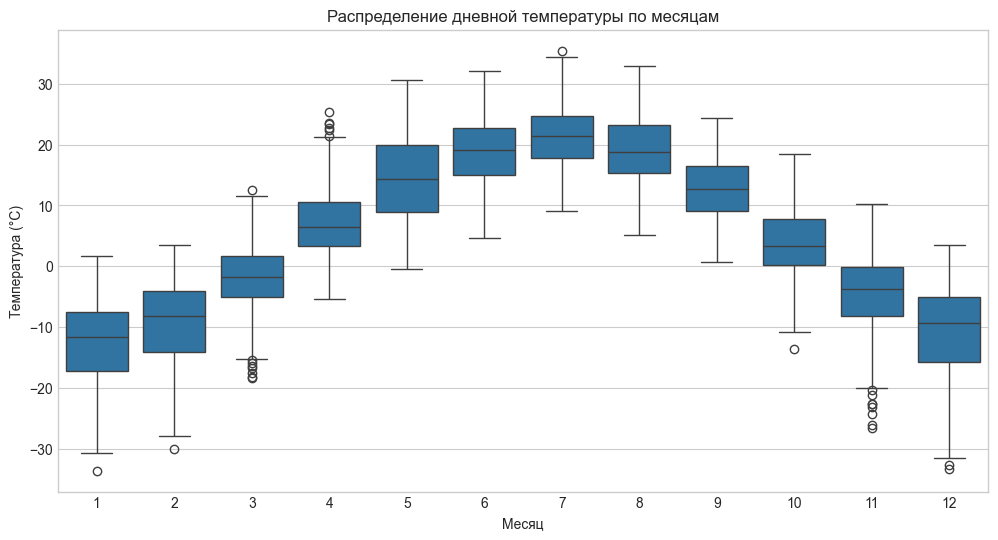

In [8]:
# --- Feature Engineering ---

# Временные признаки (циклические)
df['day_of_week'] = df.index.dayofweek
df['day_of_year'] = df.index.dayofyear
df['month'] = df.index.month
df['week_of_year'] = df.index.isocalendar().week.astype(int)
df['year'] = df.index.year

print("Данные после добавления временных признаков:")
df.info()
display(df.head())

# --- Анализ новых признаков ---
# Посмотрим, как средняя дневная температура зависит от месяца
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='temperature_day', data=df)
plt.title('Распределение дневной температуры по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Температура (°C)')
plt.show()

# Первичная визуализация

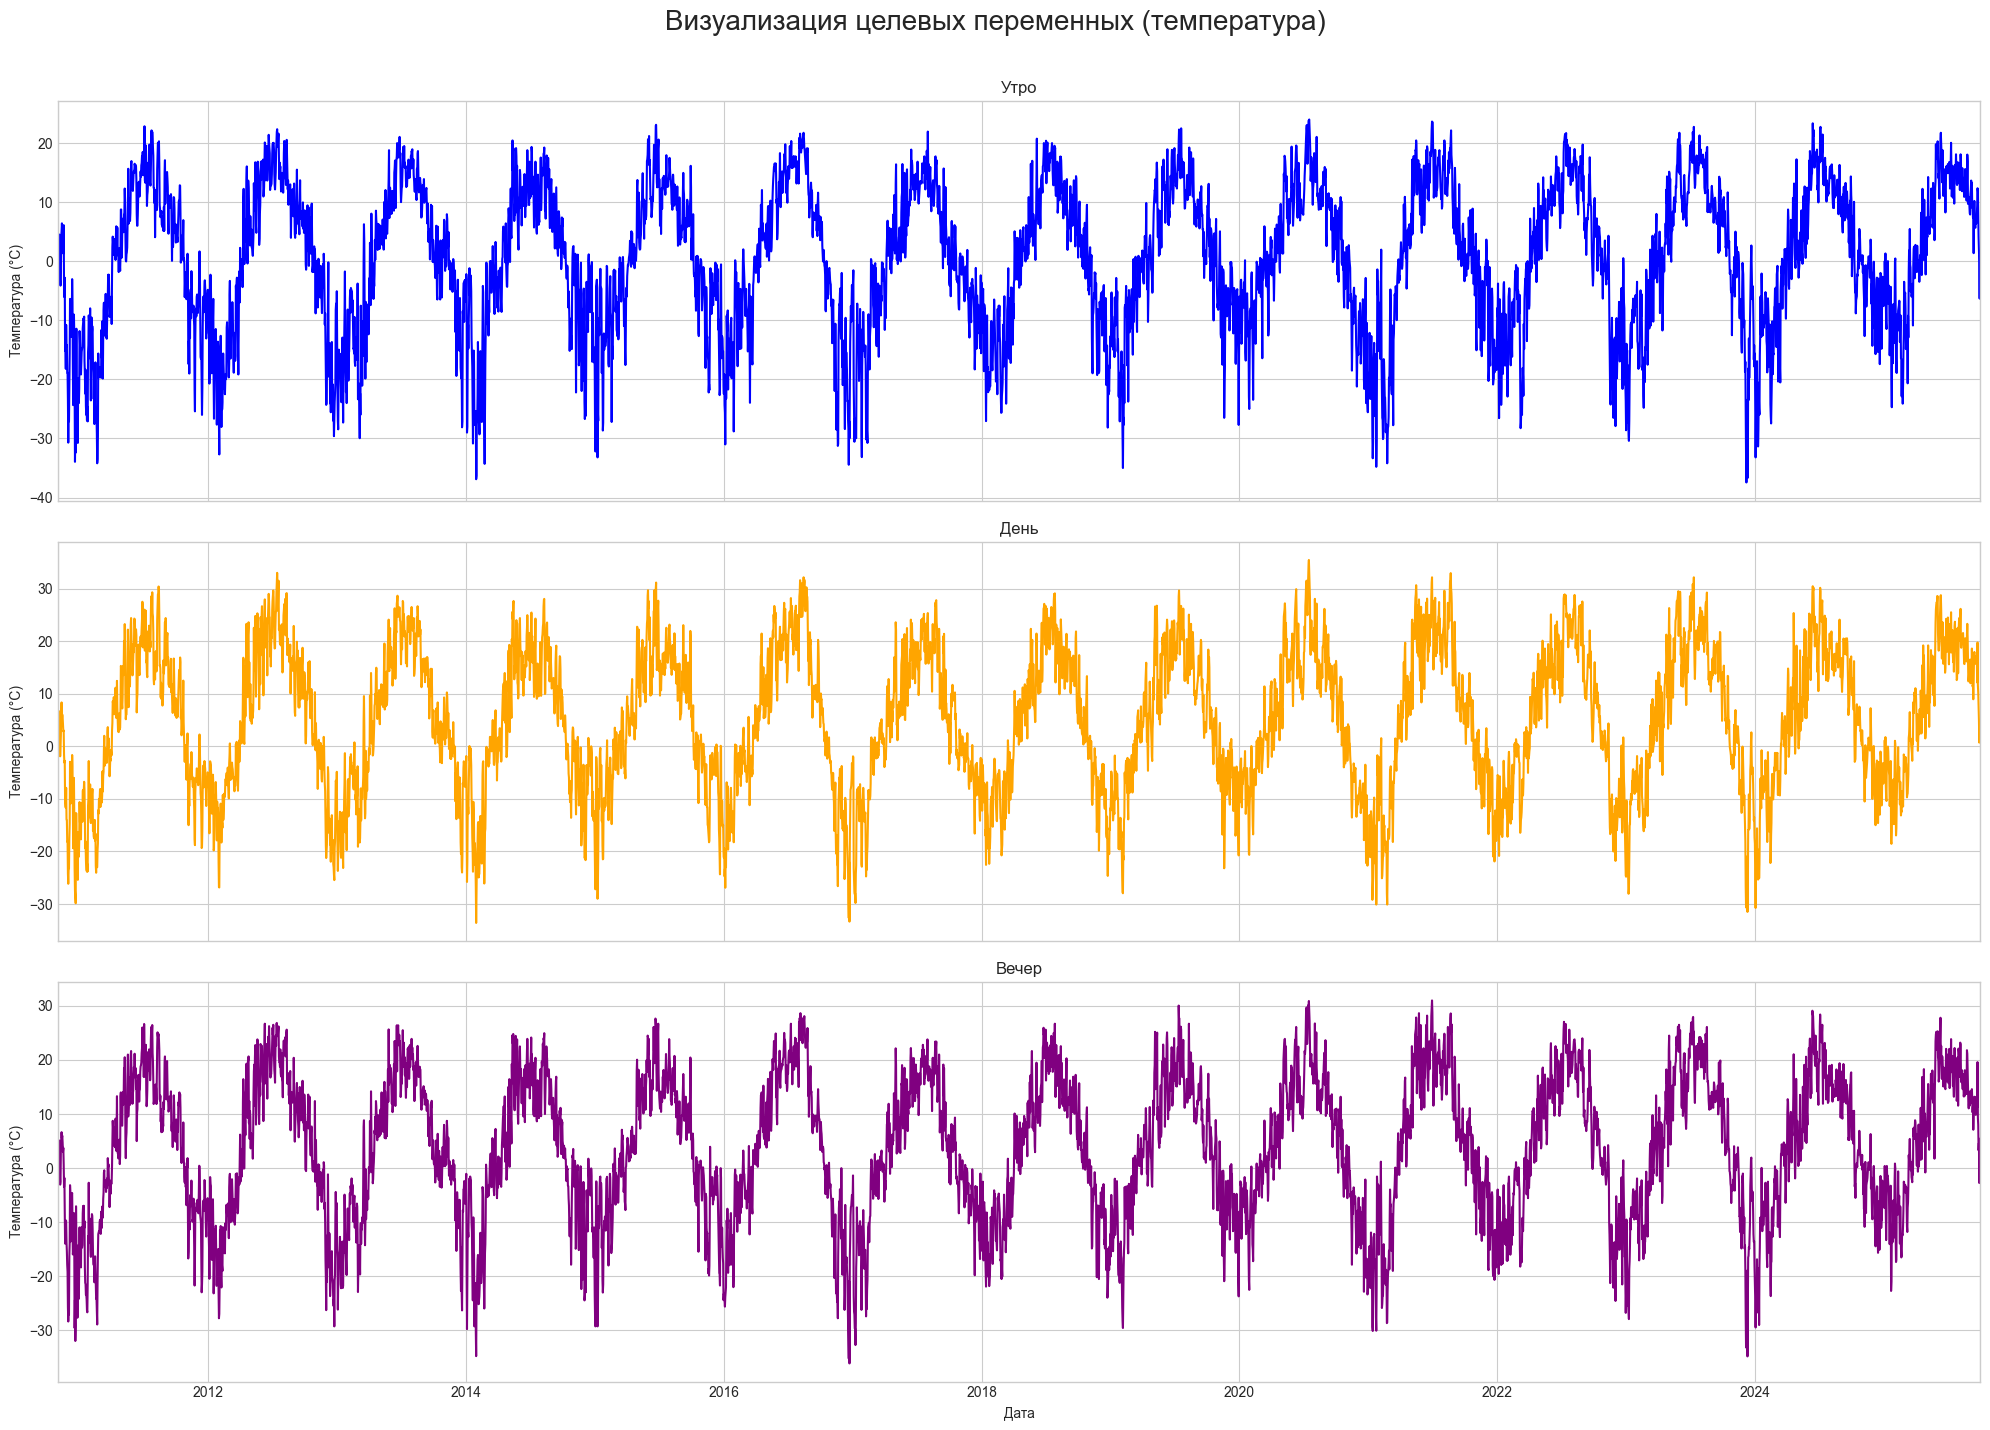

In [4]:
# Визуализируем три главные целевые переменные
fig, axes = plt.subplots(3, 1, figsize=(20, 15), sharex=True)
fig.suptitle('Визуализация целевых переменных (температура)', fontsize=20)

# Утренняя температура
df['temperature_morning'].plot(ax=axes[0], title='Утро', color='blue')
axes[0].set_ylabel('Температура (°C)')

# Дневная температура
df['temperature_day'].plot(ax=axes[1], title='День', color='orange')
axes[1].set_ylabel('Температура (°C)')

# Вечерняя температура
df['temperature_evening'].plot(ax=axes[2], title='Вечер', color='purple')
axes[2].set_ylabel('Температура (°C)')

plt.xlabel('Дата')
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

1.  **Ярко выраженная сезонность (Evidence of Strong Seasonality):**
    *   **Наблюдение:** Все три графика имеют четкую, повторяющуюся синусоидальную форму. Пики приходятся на лето, провалы — на зиму.
    *   **Что это дает:**  Такая сильная, регулярная сезонность означает, что ряд **очень предсказуем**. Модели, особенно те, которые умеют работать с сезонностью (как ARIMA) или получают информацию о времени года (как нейросети через признаки `month`, `day_of_year`), смогут легко уловить этот основной паттерн. 90% работы по предсказанию уже "зашито" в этой структуре.

2.  **Различные диапазоны и волатильность (Different Ranges and Volatility):**
    *   **Наблюдение:** Внимание привлекает то, что синий график (утро) имеет самые глубокие "провалы" зимой (до -35°C), в то время как оранжевый (день) зимой редко опускается так низко, но летом достигает самых высоких пиков. Вечерний график (фиолетовый) находится где-то посередине.
    *   **Что это дает:** Это полностью подтверждает, что решение прогнозировать `утро`, `день` и `вечер` как **три независимые, но связанные цели** — абсолютно верное. У них разное статистическое поведение, и попытка усреднить их в одно число привела бы к потере ценной информации.

3.  **Высокочастотный "шум" (High-Frequency Noise):**
    *   **Наблюдение:** Линии не гладкие, они "дрожат". Это резкие колебания температуры изо дня в день.
    *   **Что это дает:** Это и есть та самая "сложность", которую должна уловить модель. Сезонность — это легко. А вот предсказать, что завтра будет на 5 градусов холоднее, чем сегодня, хотя сезонность говорит об обратном, — это задача для лаговых признаков и экзогенных переменных (давление, облачность). Именно в предсказании этого "шума" и будет соревнование между ARIMA, N-BEATS и LSTM.

4.  **Нестационарность (Non-stationarity):**
    *   **Наблюдение:** Среднее значение ряда очевидно меняется в течение года (летом оно положительное, зимой — отрицательное). Это визуальное доказательство того, что ряд нестационарен.
    *   **Что это дает:** Следующие шаги в нашем ноутбуке — **декомпозиция** и **тест Дики-Фуллера** — как раз и предназначены для того, чтобы формально измерить и проанализировать эту нестационарность.

# Декомпозиция ряда (Тренд, Сезонность, Шум)

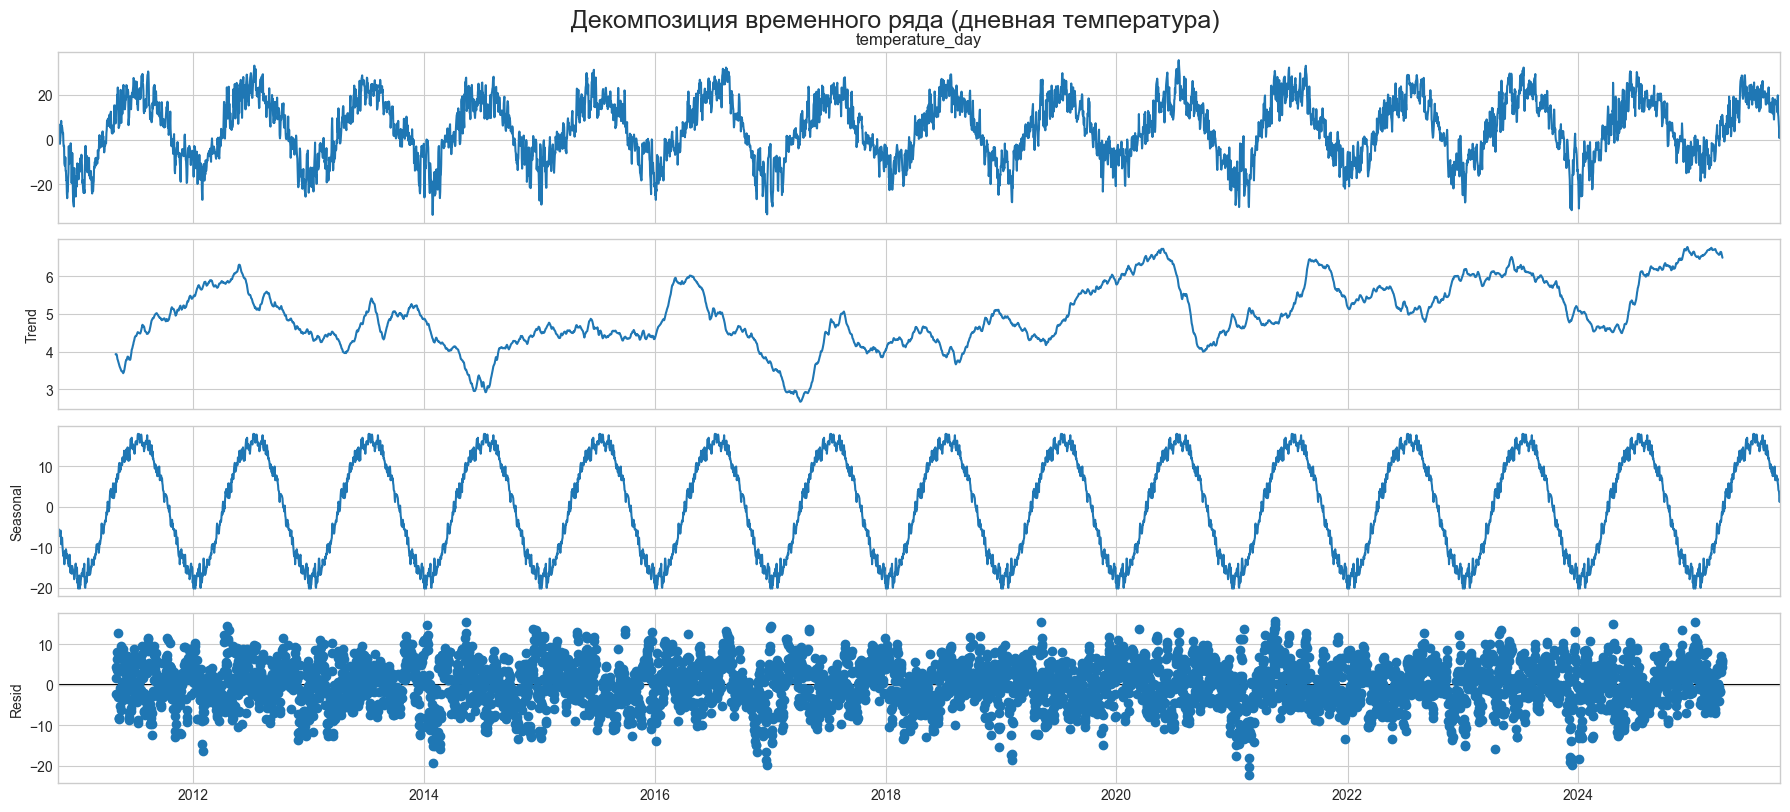

In [5]:
decomposition = seasonal_decompose(df['temperature_day'], model='additive', period=365)

fig = decomposition.plot()
fig.suptitle('Декомпозиция временного ряда (дневная температура)', y=1.01, fontsize=18)
plt.show()

Мы видим четыре графика. Сверху вниз:

**1. Исходный ряд (Observed):**
   *   Это тот же график дневной температуры, что видели ранее. Уже известно, что он содержит несколько паттернов, "слепленных" вместе.

**2. Тренд (Trend):**
   *   **Наблюдение:** Это сглаженная версия ряда, которая показывает долгосрочное направление. Видим, что линия не горизонтальна. Она имеет "волны", которые длятся по несколько лет. Например, был пик в районе 2016 и 2020 годов, и спад в 2018. В целом, можно заметить очень слабый, почти незаметный восходящий наклон за весь период.
   *   **Вывод для ML:** Наличие такого сложного, нелинейного тренда — это вызов для простых моделей. ARIMA попытается "убить" его с помощью дифференцирования (параметр `d`). Нейронные сети, особенно LSTM с ее "памятью", идеально подходят для того, чтобы выучить такие долгосрочные, немонотонные зависимости. Признак `year` может помочь им в этом.

**3. Сезонность (Seasonal):**
   *   **Наблюдение:** Это — самый красивый и самый важный график. Видим **идеальную, стабильную синусоиду** с периодом в один год. Амплитуда колебаний составляет примерно ±15-20 градусов от среднего.
   *   **Вывод для ML:** Сезонность — это самый сильный сигнал в данных. Любая модель, которая сможет его выучить, уже будет давать хороший базовый прогноз. Для нейросетей признаки `day_of_year` и `month` станут ключом к пониманию этой синусоиды. Они позволят модели "знать", в какой точке годового цикла мы находимся.

**4. Остатки (Resid / Residuals):**
   *   **Наблюдение:** Это то, что осталось после того, как мы "вычли" из исходного ряда тренд и сезонность. В идеальном мире это должен быть чисто случайный "белый шум" без каких-либо паттернов, распределенный вокруг нуля. У меня он выглядит достаточно хаотичным, что хорошо. Однако можно заметить, что зимой (когда температура низкая) разброс (волатильность) остатков немного больше, чем летом.
   *   **Вывод для ML:** Это и есть **"поле битвы" для моделей**. Именно в этих остатках скрыта информация о резких похолоданиях, оттепелях, влиянии циклонов и т.д. Именно для предсказания этих, казалось бы, случайных колебаний мы и добавляем наши "умные" признаки:
        *   **Лаги (`temp_lag_1`, `temp_lag_7`):** Если вчера было аномально холодно (большой отрицательный остаток), то, скорее всего, и сегодня будет холоднее обычного.
        *   **Экзогенные переменные (давление, облачность, ветер):** Именно они являются причиной многих из этих "выбросов". Падение давления может коррелировать с отрицательным остатком (похолоданием).

# Анализ автокорреляции (ACF и PACF)

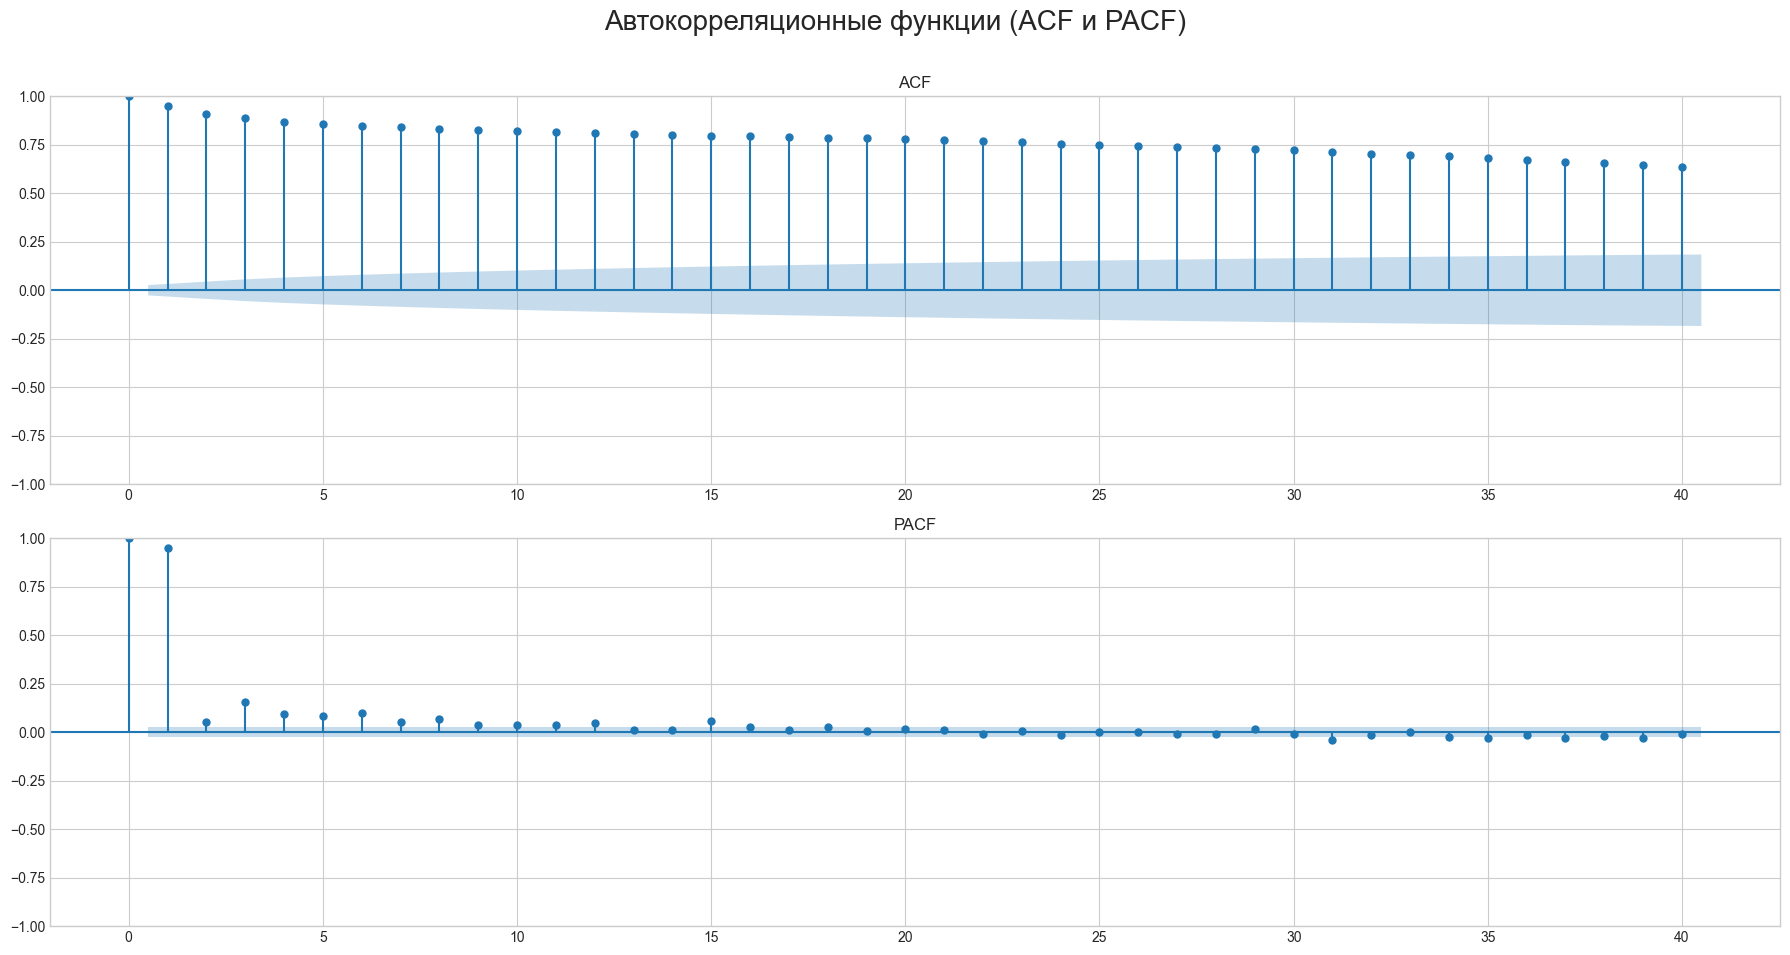

In [6]:
# ACF (Autocorrelation Function) - показывает полную корреляцию с лагом k, включая все косвенные зависимости.
# PACF (Partial Autocorrelation Function) - показывает "чистую" корреляцию с лагом k, убрав влияние более коротких лагов.

fig, axes = plt.subplots(2, 1, figsize=(18, 10))
fig.suptitle('Автокорреляционные функции (ACF и PACF)', fontsize=20)

# Строим ACF
plot_acf(df['temperature_day'], lags=40, ax=axes[0])
axes[0].set_title('ACF')

# Строим PACF
plot_pacf(df['temperature_day'], lags=40, ax=axes[1])
axes[1].set_title('PACF')

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

**1. График ACF (Autocorrelation Function / Функция автокорреляции):**
   *   **Что показывает:** Полную, "грязную" корреляцию между значением ряда сегодня (`t`) и его значениями в прошлом (`t-1`, `t-2`, ..., `t-40`). "Грязную" — потому что она включает как прямое, так и косвенное влияние. Например, `t-2` влияет на `t-1`, а `t-1` в свою очередь влияет на `t`. ACF учитывает всю эту цепочку.
   *   **Наблюдение:** Мы видим **очень медленное, почти линейное убывание** корреляции. Все 40 лагов (столбиков) статистически значимы (выходят за пределы синей зоны). Корреляция с `t-1` почти равна 1.0, с `t-40` — все еще около 0.6.
   *   **Вывод:** Такое поведение ACF — это **классический признак нестационарного ряда**, в котором присутствует сильный **тренд** и/или **сезонность**. Предыдущее значение (`t-1`) является почти идеальным предсказателем текущего, что логично для температуры (сегодняшняя температура очень похожа на вчерашнюю). Это также подтверждает, что наш ряд обладает сильной "памятью".

**2. График PACF (Partial Autocorrelation Function / Функция частной автокорреляции):**
   *   **Что показывает:** "Чистую", прямую корреляцию между `t` и `t-k`, убрав влияние всех промежуточных лагов (`t-1`, `t-2`, ..., `t-k+1`). Он отвечает на вопрос: "Какое новое знание о `t` нам дает `t-k`, если мы уже знаем все значения между ними?".
   *   **Наблюдение:** Картина кардинально иная. Видим:
        *   **Очень сильную корреляцию** с первым (`t-1`) и вторым (`t-2`) лагами. Эти два столбика значительно выше всех остальных.
        *   После второго лага корреляция **резко обрывается** и почти все остальные столбики находятся внутри синей зоны (статистически незначимы). Есть небольшие, едва заметные всплески в районе 7-го и 14-го лагов, что может намекать на слабую недельную зависимость.
   *   **Вывод:** Это самый важный вывод для Feature Engineering. PACF говорит: "Для предсказания сегодняшней температуры, самая важная информация — это температура **вчера** и **позавчера**. Значения трехдневной, четырехдневной и т.д. давности уже не добавляют почти никакой *новой* информации, потому что их влияние уже 'зашито' во вчерашнем и позавчерашнем дне".


# Проверка на стационарность (Тест Дики-Фуллера)

In [7]:
print('--- Результаты теста Дики-Фуллера для дневной температуры ---')
# Нулевая гипотеза (H0): Ряд нестационарен.
# Альтернативная гипотеза (H1): Ряд стационарен.

dftest = adfuller(df['temperature_day'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput[f'Critical Value ({key})'] = value
    
print(dfoutput)

--- Результаты теста Дики-Фуллера для дневной температуры ---
Test Statistic                  -4.268
p-value                          0.001
#Lags Used                      17.000
Number of Observations Used   5430.000
Critical Value (1%)             -3.432
Critical Value (5%)             -2.862
Critical Value (10%)            -2.567
dtype: float64


**1. Прямая интерпретация (Формальная):**
   *   **Нулевая гипотеза (H0):** Ряд **нестационарен** (имеет "единичный корень").
   *   **Результат `p-value`: 0.001**.
   *   **Правило:** Если `p-value` < 0.05, **отвергаем** нулевую гипотезу.
   *   **Формальный вывод:** `0.001` < `0.05`. С уверенностью в 99.9% отвергаем гипотезу о нестационарности. Тест Дики-Фуллера утверждает, что наш временной ряд **является стационарным**.

**2. Разрешение парадокса:**
   *   **Противоречие:** Подождите. Но ведь мы только что на графиках декомпозиции и ACF видели железобетонные доказательства обратного! Тренд есть, сезонность есть, ACF затухает медленно. Как ряд может быть стационарным?
   *   **Объяснение:** Здесь кроется ключевая деталь. Существуют разные типы нестационарности. Тест Дики-Фуллера в его базовой форме очень хорошо ищет так называемую **стохастическую нестационарность** (наличие "единичного корня"), характерную для процессов типа "случайного блуждания" (например, цены на акции).
   *   Наш ряд имеет **детерминированную нестационарность**. Его нестационарность вызвана не случайными блужданиями, а **предсказуемым, детерминированным паттерном** — годовой сезонностью (идеальной синусоидой) и слабым трендом.
   *   **Что на самом деле "увидел" тест?** Расширенный тест Дики-Фуллера (Augmented Dickey-Fuller) строит внутри себя регрессионную модель, используя лаги (`#Lags Used: 17`). Он смог "объяснить" поведение ряда его прошлыми значениями настолько хорошо, что пришел к выводу: процесс не является случайным блужданием, он предсказуем и возвращается к своему среднему (в данном случае — к сезонному среднему). Поэтому он и отверг гипотезу о наличии "единичного корня".